In [421]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [422]:
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

In [423]:
# Import Basic Libraries
import numpy as np
import pandas as pd

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigating Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Classification Model Building
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classfier
from sklearn.ensemble import BaggingClassifier #Bagging Classifier
from sklearn.ensemble import AdaBoostClassifier #AdaBoost Classifier
from sklearn.ensemble import GradientBoostingClassifier #GradientBoost Classifier
from sklearn.ensemble import RandomForestClassifier #RandomForest Classifier

# Import Libraries for Train-Test split, Scaling and Metric calculation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

# Identification of Optimum vales for Hyperparameters for Model Tuning
from sklearn.model_selection import GridSearchCV

In [424]:
# Loading Dataset
iris = pd.read_csv('iris.csv')

In [425]:
#printing random rows form the dataset
iris.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,114,5.7,2.5,5.0,2.0,Iris-virginica
35,36,5.0,3.2,1.2,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
62,63,6.0,2.2,4.0,1.0,Iris-versicolor
96,97,5.7,2.9,4.2,1.3,Iris-versicolor
68,69,6.2,2.2,4.5,1.5,Iris-versicolor
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
40,41,5.0,3.5,1.3,0.3,Iris-setosa
110,111,6.5,3.2,5.1,2.0,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

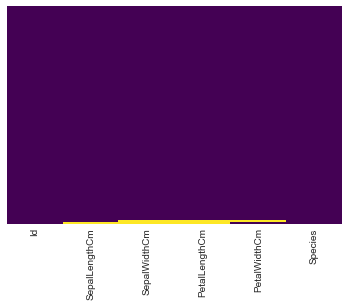

In [426]:
#Missing Value through data visualization
sns.heatmap(iris.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [427]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    151 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     151 non-null float64
Species          152 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [428]:
missing_values=iris.columns[iris.isnull().any()]
iris[missing_values].isnull().sum()

SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
dtype: int64

In [429]:
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


In [430]:
# Replacing missing values with Median
iris['SepalLengthCm'] = iris['SepalLengthCm'].fillna(iris['SepalLengthCm'].median()).astype(float)

In [431]:
iris['SepalWidthCm'] = iris['SepalWidthCm'].fillna(iris['SepalWidthCm'].median()).astype(float)

In [432]:
iris['PetalLengthCm'] = iris['PetalLengthCm'].fillna(iris['PetalLengthCm'].median()).astype(float)

In [433]:
iris['PetalWidthCm'] = iris['PetalWidthCm'].fillna(iris['PetalWidthCm'].median()).astype(float)

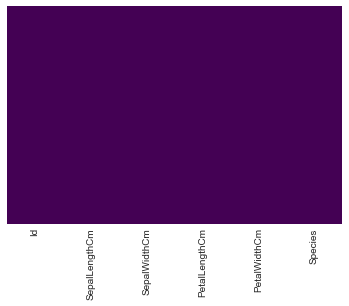

In [434]:
# checking the missing values after replacement
sns.heatmap(iris.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [435]:
# checking the missing values after replacement
missing_values=iris.columns[iris.isnull().any()]
iris[missing_values].isnull().sum()

Series([], dtype: float64)

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [436]:
# Changing the classes to numerics from 0-2
iris['Species']=pd.factorize(iris['Species'])[0]
iris.groupby(['Species']).count()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,,
0,50,50,50,50,50
1,50,50,50,50,50
2,52,52,52,52,52


In [437]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152 entries, 0 to 151
Data columns (total 6 columns):
Id               152 non-null int64
SepalLengthCm    152 non-null float64
SepalWidthCm     152 non-null float64
PetalLengthCm    152 non-null float64
PetalWidthCm     152 non-null float64
Species          152 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


In [438]:
# For calculation we dont want the id column
iris.drop('Id',axis=1,inplace=True)

## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

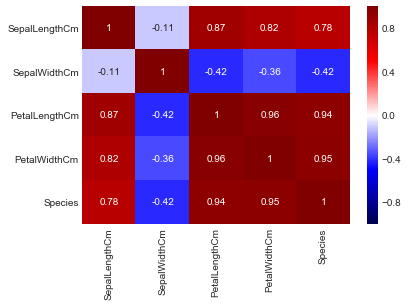

In [439]:
fig, ax = plt.subplots()
sns.heatmap(iris.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
# there is no varibles associated between -0.1 and 0.1 

In [440]:
# correlation using corr() function
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871120,0.815986,0.775061
SepalWidthCm,-0.109369,1.000000,-0.420713,-0.356510,-0.417318
PetalLengthCm,0.871120,-0.420713,1.000000,0.962043,0.944477
PetalWidthCm,0.815986,-0.356510,0.962043,1.000000,0.952513
Species,0.775061,-0.417318,0.944477,0.952513,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [441]:
iris.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
Species          0.675322
dtype: float64

In [442]:
# Dependent Variable
Y = iris['Species']

# Independent Variable
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (152,) 

Shape of Independent Variable:
 (152, 4)


In [443]:
X.var()

SepalLengthCm    0.676645
SepalWidthCm     0.185552
PetalLengthCm    3.076516
PetalWidthCm     0.577141
dtype: float64

In [ ]:
# no variance falls with in range(variance < 0.1)

## Question 6

*Plot the scatter matrix for all the variables.*

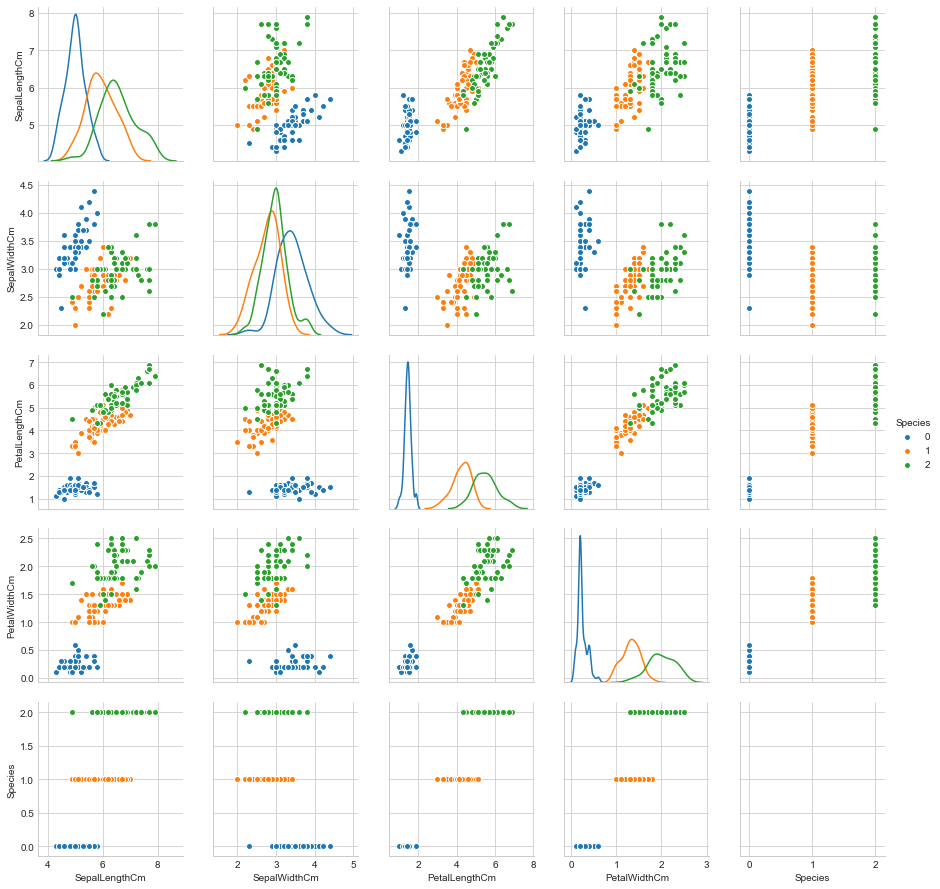

In [444]:
sns.pairplot(iris,hue='Species',diag_kind='kde')

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [445]:
# before building the model scaling the data using  z score
XZ= X.apply(stats.zscore)
XZ.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.90675,1.040463,-1.353632,-1.325008
1,-1.15069,-0.124120,-1.353632,-1.325008
2,-1.39463,0.341713,-1.410833,-1.325008
3,-1.51660,0.108797,-1.296431,-1.325008
4,-1.02872,1.273380,-1.353632,-1.325008


In [446]:
# Dividing the dataset into train and test sets
XZ_train, XZ_test, Y_train, Y_test = train_test_split(XZ, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of XZ Train:\t",XZ_train.shape)
print("Shape of XZ Test:\t",XZ_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of XZ Train:	 (121, 4)
Shape of XZ Test:	 (31, 4)
Shape of Y Train:	 (121,)
Shape of Y Test:	 (31,)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [447]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [448]:
# building the model for different k values
NNH3 = KNeighborsClassifier(n_neighbors= 3 , weights = 'uniform', metric='euclidean')
NNH5 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform', metric='euclidean')
NNH9 = KNeighborsClassifier(n_neighbors= 9 , weights = 'uniform', metric='euclidean')


In [449]:
# Call Nearest Neighbour algorithm

NNH3.fit(XZ_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [450]:
# Prediction
NNH3_predicted = NNH3.predict(XZ_test)

In [451]:
# printing the accuracy of the k value 3 model
print("Accuracy on Training Set with KNN:",NNH3.score(XZ_train,Y_train))
print("Accuracy on Testing Set with KNN:",(accuracy_score(Y_test,NNH3_predicted)))


Accuracy on Training Set with KNN: 0.9586776859504132
Accuracy on Testing Set with KNN: 0.9032258064516129


In [452]:
# Call Nearest Neighbour algorithm

NNH5.fit(XZ_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [453]:
# Prediction
NNH5_predicted = NNH5.predict(XZ_test)

In [454]:
# printing the accuracy of the k value 5 model
print("Accuracy on Training Set with KNN:",NNH5.score(XZ_train,Y_train))
print("Accuracy on Testing Set with KNN:",(accuracy_score(Y_test,NNH5_predicted)))

Accuracy on Training Set with KNN: 0.9669421487603306
Accuracy on Testing Set with KNN: 0.9354838709677419


In [455]:
# Call Nearest Neighbour algorithm

NNH9.fit(XZ_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')

In [456]:
# Prediction
NNH9_predicted = NNH9.predict(XZ_test)

In [457]:
# printing the accuracy of the k value 9 model
print("Accuracy on Training Set with KNN:",NNH9.score(XZ_train,Y_train))
print("Accuracy on Testing Set with KNN:",(accuracy_score(Y_test,NNH9_predicted)))

Accuracy on Training Set with KNN: 0.9586776859504132
Accuracy on Testing Set with KNN: 0.9354838709677419


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [458]:
from sklearn.grid_search import GridSearchCV

k = [1,3,5,7,9,11,13,15,17,19]
knn = KNeighborsClassifier(weights = 'uniform', metric='euclidean')
parameters = {'n_neighbors': k}
GS = GridSearchCV(knn,parameters,cv=10)

In [459]:
GS.fit(XZ,Y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [460]:
print("Best Accuracy",GS.best_score_)
print("Best Parameter",GS.best_params_)

Best Accuracy 0.9473684210526315
Best Parameter {'n_neighbors': 15}


In [461]:
scores=pd.DataFrame(GS.grid_scores_)
scores.drop('cv_validation_scores',axis=1,inplace=True)
scores

,parameters,mean_validation_score
0,{'n_neighbors': 1},0.940789
1,{'n_neighbors': 3},0.940789
2,{'n_neighbors': 5},0.940789
3,{'n_neighbors': 7},0.940789
4,{'n_neighbors': 9},0.940789
5,{'n_neighbors': 11},0.934211
6,{'n_neighbors': 13},0.940789
7,{'n_neighbors': 15},0.947368
8,{'n_neighbors': 17},0.934211
9,{'n_neighbors': 19},0.940789


In [462]:
scores['MSE']=1-scores['mean_validation_score']
scores


,parameters,mean_validation_score,MSE
0,{'n_neighbors': 1},0.940789,0.059211
1,{'n_neighbors': 3},0.940789,0.059211
2,{'n_neighbors': 5},0.940789,0.059211
3,{'n_neighbors': 7},0.940789,0.059211
4,{'n_neighbors': 9},0.940789,0.059211
5,{'n_neighbors': 11},0.934211,0.065789
6,{'n_neighbors': 13},0.940789,0.059211
7,{'n_neighbors': 15},0.947368,0.052632
8,{'n_neighbors': 17},0.934211,0.065789
9,{'n_neighbors': 19},0.940789,0.059211


In [470]:
scores.sort_values('MSE', inplace=True, ascending=True)
scores

,parameters,mean_validation_score,MSE
7,{'n_neighbors': 15},0.947368,0.052632
0,{'n_neighbors': 1},0.940789,0.059211
1,{'n_neighbors': 3},0.940789,0.059211
2,{'n_neighbors': 5},0.940789,0.059211
3,{'n_neighbors': 7},0.940789,0.059211
4,{'n_neighbors': 9},0.940789,0.059211
6,{'n_neighbors': 13},0.940789,0.059211
9,{'n_neighbors': 19},0.940789,0.059211
5,{'n_neighbors': 11},0.934211,0.065789
8,{'n_neighbors': 17},0.934211,0.065789


In [467]:
# best n neighbour is 15 and the MSE is 0.052632

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

([<matplotlib.axis.XTick at 0x1e06797cb00>,
 <a list of 10 Text xticklabel objects>)

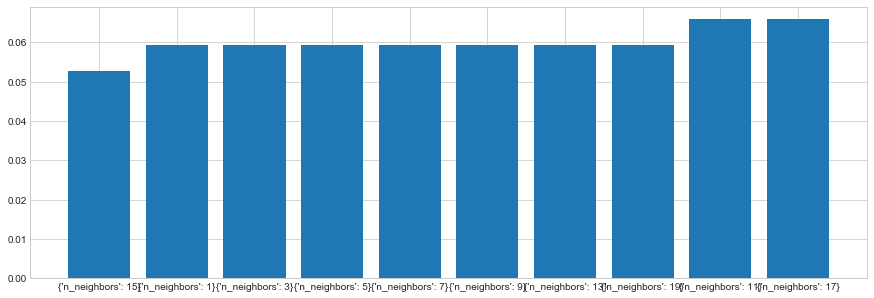

In [465]:
fig,ax=plt.subplots()
fig.set_size_inches(15,5)
ypos=np.arange(len(scores['parameters']))
plt.bar(ypos,scores['MSE'])
plt.xticks(ypos,scores['parameters'])

# Naive Bayes with Iris Data

In [419]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [471]:
# Dependent Variable
Y = iris['Species']

# Independent Variable
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

print("Shape of Dependent Variable:\n", Y.shape,"\n")
print("Shape of Independent Variable:\n", X.shape)

Shape of Dependent Variable:
 (152,) 

Shape of Independent Variable:
 (152, 4)


In [472]:
#Check the dataset
print(Y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
150    2
151    2
Name: Species, Length: 152, dtype: int64
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5           1.40           0.2
1              4.9           3.0           1.40           0.2
2              4.7           3.2           1.30           0.2
3              4.6           3.1           1.50           0.2
4              5.0           3.6           1.40           0.2
5              5.4           3.9      

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [473]:
#distribution among all variables
iris.groupby(["Species"]).count()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Species,,,,
0,50,50,50,50
1,50,50,50,50
2,52,52,52,52


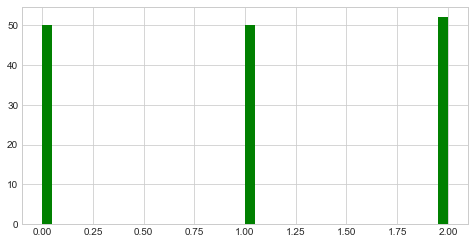

In [474]:
iris['Species'].hist(color='green',bins=40,figsize=(8,4))

In [ ]:
#Drop Id variable from data

### Question 12 
Find Correlation among all variables and give your insights 

In [1]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

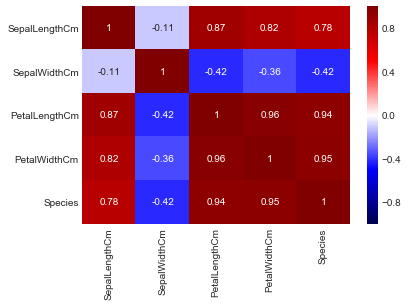

In [475]:
fig, ax = plt.subplots()
sns.heatmap(iris.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

In [ ]:
# no variables voted twice here

### Split data in Training and test set in 80:20.

In [477]:
# Dividing the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)
# random state is setting up a seed value

# Shape of training and tst feature set
print("Shape of X Train:\t",X_train.shape)
print("Shape of X Test:\t",X_test.shape)
print("Shape of Y Train:\t",Y_train.shape)
print("Shape of Y Test:\t",Y_test.shape)

Shape of X Train:	 (121, 4)
Shape of X Test:	 (31, 4)
Shape of Y Train:	 (121,)
Shape of Y Test:	 (31,)


### Question 13 
Do Feature Scaling 

In [ ]:
# Use StandardScaler or similar methods

In [479]:
#feature scaling using z score
X_train= X_train.apply(stats.zscore)
X_test=X_test.apply(stats.zscore)



In [480]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
132,0.678468,-0.585957,1.037506,1.293854
110,0.800451,0.412646,0.748979,1.029177
12,-1.273262,-0.086656,-1.386123,-1.485252
16,-0.541363,2.160201,-1.443829,-1.088237
81,-0.419380,-1.584560,-0.058898,-0.294207


In [481]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
101,-0.051127,-0.818032,0.818144,1.016184
11,-1.270315,0.526763,-1.126405,-1.224523
119,0.192710,-1.778599,0.762586,0.488959
15,-0.173046,2.447898,-1.181963,-0.960911
124,1.046142,0.334649,1.151496,1.279797


### Question 14 
Train and Fit NaiveBayes Model

In [482]:
#Fit the model
model = GaussianNB()
model.fit(X_train, Y_train)

GaussianNB(priors=None)

In [483]:
# make predictions
expected = Y_test
predicted = model.predict(X_test)

# summarize the fit of the model



             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.88      1.00      0.93         7
          2       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        31

[[12  0  0]
 [ 0  7  0]
 [ 0  1 11]]


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [484]:
# show Confusion Matrix
print(metrics.confusion_matrix(expected, predicted))

[[12  0  0]
 [ 0  7  0]
 [ 0  1 11]]


In [486]:
# show accuracy
print("Accuracy on Training Set with Naiv:",model.score(X_train,Y_train))
print("Accuracy on Testing Set with Naiv:",(accuracy_score(Y_test,predicted)))

Accuracy on Training Set with Naiv: 0.9504132231404959
Accuracy on Testing Set with Naiv: 0.967741935483871


In [485]:
#Show precision and Recall metrics
print(metrics.classification_report(expected, predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.88      1.00      0.93         7
          2       1.00      0.92      0.96        12

avg / total       0.97      0.97      0.97        31

